<h1 style="text-align: center;"> Sci kit Learn </h1>
<h1 style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</h1>

## Funcionamineto básico.
Tal y como pasa en todos los modelos de predicción(Aprendizaje Supervisado), tendremos nuestros datos diferenciados por las variables independientes (**X**) y por la variables dependientes (**y**).
<div style="text-align:center;">
    <img src="Imagenes_Scikit/Introduccion.png">
</div>


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target

Una vez tenemos nuestros datos bien depurados, podremos empezar a crear nuestro modelo, el cual aprende de los datos introducidos. 
Para crearlo tenemos que hacer dos pasos:
<div style="width: 100%; text-align: center;">
  <span style="display: inline-block; border: 2px solid #007BFF; padding: 8px 12px; border-radius: 5px; background-color: #E6F0FF; color: #003366;">
    1. Creamos el modelo → Todos los modelos son objetos en Python
  </span>
  <br>
  <span style="display: inline-block; border: 2px solid #007BFF; padding: 8px 12px; border-radius: 5px; background-color: #E6F0FF; color: #003366;">
    2. Aprende o ajustamos el modelo -> Es el momento donde el objeto aprende de los datos
  </span>
</div>

In [3]:
from sklearn.neighbors import KNeighborsRegressor

modelo = KNeighborsRegressor()
modelo.fit(X,y)

KNeighborsRegressor()

Finalmente con l modelo cargado tan solo dembemos llamar al metodo:
<div style="width: 100%; text-align: center;">
  <span style="display: inline-block; border: 2px solid #007BFF; padding: 8px 12px; border-radius: 5px; background-color: #E6F0FF; color: #003366;">
    .predict(X_newvalues)
  </span>
</div>

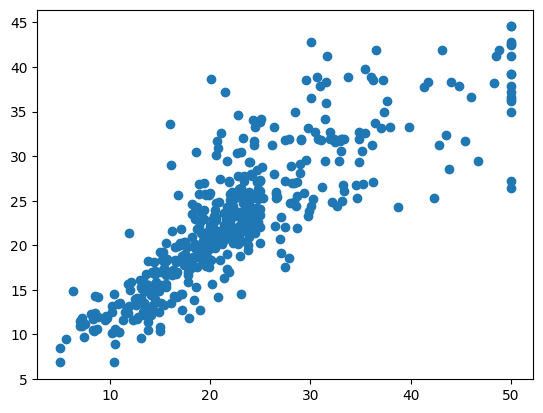

In [4]:
pred = modelo.predict(X)

plt.scatter(y, pred)


### Pipelines -> PREPROCESSING
Antes de poder entrenar nuestro modelos, muchas veces será necesario procesar nuestros datos para que nos den el mejor resultados, esto se llama <span style="color: lightblue;">Preprocessing</span>, de alguna forma el preprocesamiento se podría contar como un proceso incluido en la creacion del modelo 

<div style="text-align:center;">
    <img src="Imagenes_Scikit/Pipelines.png">
</div>

Usaremos una <span style="color: salmon;">Pipeline</span> para tener todo el proceso escrito en unas lineas

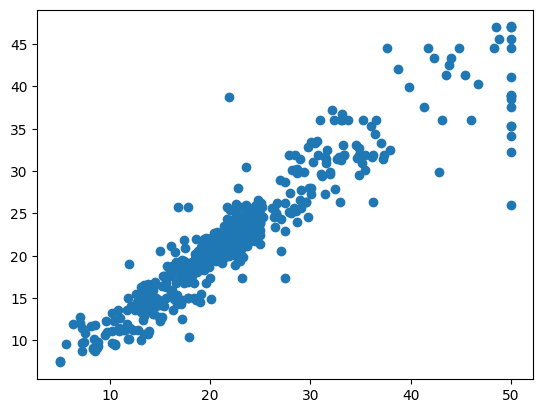

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # Es un objeto -> Trabaja muy parecido a los modelos, tiene los metodos .fit() y .predict()

modelo = KNeighborsRegressor().fit(X,y)

pipe = Pipeline([   # Lista con toda la cadena
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe.fit(X, y)

pred = pipe.predict(X)

plt.scatter(y, pred)

### GridSearchCV
Después de haber preprocesado nuestro datos, es común que debamos repetir el proceso de crear modelos con **distintos parametros**. Estos distintos parametros pueden ser:
* Hiperparametros del modelo
* División de Train-test
En vez de tener que repetir una y otra vez las mismas líneas de código, Skleanr nos trae el objeto <span style="color: lightblue;">GridSearch</span>

<div style="text-align:center;">
    <img src="Imagenes_Scikit/GridSearchCv.png">
</div>

Tambien trabaja con `.fit(X, y)` y `.predict(X)`. Pero además está el atributo `cv_results_`que nos da los resultados de todos los modelos creados

In [ ]:
from sklearn.model_selection import GridSearchCV

modelo = GridSearchCV(estimator=pipe, 
                      param_grid={"model__n_neighbors":[1,2,3,4,5,6,7,8]},
                      cv=3)
modelo.fit(X, y)
pd.DataFrame(modelo.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018999,0.003265,0.016353,0.006371,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,8
1,0.008996,0.000815,0.007669,0.001699,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,7
2,0.006333,0.001248,0.005000,0.000816,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.007333,0.000473,0.004345,0.000487,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,5
4,0.007334,0.001883,0.004319,0.000456,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,6
5,0.006654,0.001684,0.005011,0.001434,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,4
6,0.007323,0.001229,0.004332,0.000450,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,3
7,0.006329,0.000451,0.005001,0.000821,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
